In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt  
import scipy
from scipy.stats import norm
import collections
from collections import Counter
from ipywidgets import interactive, IntSlider
from kmer_fastq import read_sequence, kmer_frequency, shuffled_sequence, kmer_count, counts_mean_CI
import random
import numpy as np
from scipy.integrate import simps
from numpy import trapz

In [2]:
def bar_interactive(length):
    sequence = read_sequence(filename)
    output = kmer_frequency(sequence,length)
    top10 = dict(Counter(output).most_common(10))
    
    #Plot the bar chart for top 10 values
    fig1 = plt.figure(figsize = (20,5))
    ax = fig1.add_subplot(1,1,1)
    ax.bar(list(top10.keys()), top10.values(), color = "b")
    ax.set_xlabel("Fragments",fontsize = 15)
    ax.set_ylabel("Counts",fontsize = 15)

In [7]:
%matplotlib inline
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF170YQV_rep2_2.fq'
sequence = read_sequence(filename)
length = 12
output_dict = kmer_frequency(sequence,length)

# create interactive sliders for kmer sequence
length_widget = IntSlider(min = 1, max = 1000, value = length)

# adjust settings to prevent continous recalculation and update of plot while user drags widget
for item in [ length_widget ]:
    item.continuous_update = False

interactive(bar_interactive, length = length_widget)

interactive(children=(IntSlider(value=12, continuous_update=False, description='length', max=1000, min=1), Out…

In [ ]:
# Generate the counts for the choosen kmer sequence
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF239CML_rep1_2.fq'
sequence = read_sequence(filename)
kmer_sequence = "GGGTGGGG"
length = 8
output_dict = kmer_frequency(sequence, length)
total_dicts = shuffled_sequence(sequence, length)
kmer_counts = kmer_count(total_dicts,kmer_sequence)
print(output_dict[kmer_sequence])

In [2]:
# 6-mer replicate 2 read 2 (All sequences): GGGAGG
# kmer_counts = [157794, 158375, 158745, 158508, 157856, 159387, 158277, 158693, 158840, 158336, 158911, 158514, 159032, 158485, 158863, 158361, 157993, 158018, 158471, 158289, 158157, 158316, 157982, 158852, 158327, 158263, 158294, 157716, 158650, 159102, 158091, 158760, 158568, 158008, 158311, 158455, 158380, 158121, 158152, 158647, 158654, 158538, 158982, 158563, 158300, 158519, 158807, 158227, 158779, 158509, 158527, 159230, 157870, 158588, 159090, 158420, 158713, 158744, 159220, 158623, 157781, 158842, 158457, 158740, 158710, 158219, 158253, 158139, 158561, 158589, 157971, 158469, 158623, 158239, 158594, 158135, 158407, 157824, 158857, 158297, 158577, 158738, 158645, 158628, 158213, 157864, 158691, 158725, 158629, 158757, 158430, 158713, 158549, 158978, 158646, 158271, 158332, 158675, 158122, 158602]

In [41]:
# 6-mer replicate 1 read 2 for first 100000 sequences: GGGAGG
# kmer_counts = [4979, 5077, 5019, 5006, 5027, 5163, 4941, 4873, 5022, 4999, 5013, 5001, 5023, 4988, 5078, 4933, 4971, 4962, 4966, 4904, 5040, 4973, 4908, 5022, 4957, 4941, 4878, 4939, 4979, 5052, 4928, 4957, 4966, 4978, 4941, 5033, 4929, 4935, 4937, 4981, 5071, 4887, 4898, 4863, 5046, 4923, 5049, 5030, 4972, 4982, 4796, 4931, 4986, 4992, 5077, 4927, 4871, 4891, 4959, 4911, 4932, 4896, 4929, 4952, 4988, 5056, 5052, 5073, 5104, 4995, 5064, 4936, 5118, 4868, 5103, 4919, 4961, 5015, 4879, 4912, 5004, 4912, 4974, 4990, 5006, 4885, 4994, 4964, 5014, 4974, 5032, 4965, 4987, 4860, 5031, 4959, 4955, 4931, 4990, 4931]

In [38]:
# 6-mer replicate 2 read 2 for first 100000 sequences: GGGAGG
# kmer_counts = [3858, 4053, 4115, 4012, 3886, 3859, 3975, 3985, 3978, 4012, 3892, 3999, 3969, 3974, 3941, 3991, 3954, 4023, 3955, 4041, 4030, 4035, 3911, 4093, 3949, 4049, 4031, 3956, 3986, 4064, 3901, 4023, 4024, 3856, 3920, 3931, 4063, 3948, 4032, 4024, 3881, 4010, 3965, 4020, 3905, 4053, 3922, 4051, 3933, 3972, 3970, 3959, 4048, 4032, 3966, 4013, 3954, 3929, 3942, 4020, 4019, 3871, 4057, 4077, 4048, 3953, 3992, 3840, 4006, 3977, 3989, 3905, 3977, 3996, 4012, 3968, 3977, 3958, 3869, 3914, 3945, 3909, 3885, 3917, 4011, 3954, 4057, 4013, 3980, 3989, 4038, 3926, 3996, 3877, 3925, 3911, 4072, 4038, 3984, 4075]

In [27]:
# 8-mer replicate 1 read 2 for first 100000 sequences: GGGTGGGG
# kmer_counts = [846, 931, 876, 792, 900, 867, 876, 835, 833, 837, 870, 873, 860, 874, 808, 848, 833, 782, 904, 842, 854, 888, 882, 852, 853, 885, 830, 813, 833, 850, 854, 859, 893, 861, 833, 837, 840, 818, 883, 854, 840, 805, 846, 864, 867, 849, 864, 816, 869, 824, 824, 840, 900, 818, 847, 880, 860, 806, 869, 875, 805, 829, 822, 854, 841, 847, 808, 808, 801, 878, 821, 840, 852, 838, 881, 897, 823, 912, 870, 875, 879, 863, 830, 863, 830, 827, 848, 834, 874, 849, 894, 855, 845, 861, 886, 833, 893, 873, 841, 849]

In [29]:
# 8-mer replicate 2 read 2 for first 100000 sequences: GGGTGGGG
# kmer_counts = [679, 657, 705, 672, 697, 652, 656, 683, 627, 696, 679, 681, 660, 666, 656, 683, 685, 646, 663, 660, 662, 678, 673, 651, 690, 659, 667, 678, 651, 689, 655, 623, 661, 643, 689, 678, 667, 667, 659, 683, 655, 639, 681, 698, 634, 674, 657, 722, 695, 706, 652, 687, 656, 680, 625, 667, 670, 678, 710, 628, 641, 723, 690, 688, 657, 661, 680, 617, 709, 635, 672, 687, 687, 661, 623, 622, 693, 687, 658, 681, 615, 605, 683, 704, 677, 642, 686, 696, 692, 655, 652, 653, 661, 646, 690, 659, 641, 688, 632, 663]

In [15]:
# 12-mer replicate 1 read 2 for first 100000 sequences: ACACGCACTCTA
# kmer_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]

In [44]:
# 12-mer replicate 2 read 2 for first 100000 sequences: CCAGGCTGGAGT
# kmer_counts = [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

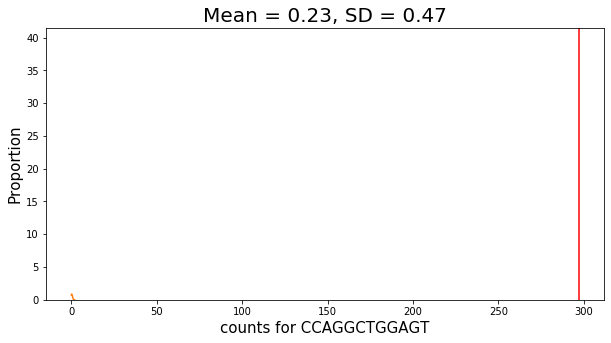

In [45]:
# Plot the histogram
fig2 = plt.figure(figsize = (10,5))
ax1 = fig2.add_subplot(1,1,1)

_, bins, _ = ax1.hist(kmer_counts, bins = 100, density=1, alpha=0.5,label = "bins")

mu, sigma = scipy.stats.norm.fit(list(kmer_counts))
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
ax1.plot(bins, best_fit_line, label = 'trendline')
ax1.set_xlabel("counts for CCAGGCTGGAGT", fontsize = 15)
ax1.set_ylabel("Proportion", fontsize = 15)
ax1.set_title(f"Mean = {mu:.2f}, SD = {sigma:.2f}",fontsize = 20)
ax1.axvline(x = 297, color = 'r')

In [3]:
filename = '/Users/apple/Desktop/Summer_project/dataset/ENCFF170YQV_rep2_2.fq'
sequence = read_sequence(filename)
length = 8
real_counts = kmer_frequency(sequence, length)
total_dicts = shuffled_sequence(sequence,length)
mean_values, upper_CI, lower_CI = counts_mean_CI(total_dicts, confidence = 0.95)

In [4]:
# Save the kmer counts of the original datasets to a dict
value_counts = {}
for value in real_counts.values():
    value_counts[value] = list(real_counts.values()).count(value)

In [11]:
# Calculate the area under the curve of real counts
# Using this command if you want to use proportion as y axis. 
# value_counts = {k: v / total for total in (sum(value_counts.values(), 0.0),) for k, v in value_counts.items()}

# value_counts = collections.OrderedDict(sorted(value_counts.items()))
# x = np.array(list(value_counts.keys()))
# y = np.array(list(value_counts.values()))
# real_area = sum({k*v for k, v in value_counts.items()})

# real_area = trapz(y,x)
real_area = 0
for key,value in value_counts.items():
    real_area += key*value
print(real_area)

335761


In [25]:
# Check whether the results of key*value are the same for real counts and for shuffled datasets
# quick check using one shuffled dictionary
dicti_counts = {}
dicti = total_dicts[70]
for value in dicti.values():
    dicti_counts[value] = list(dicti.values()).count(value)
    
area = 0
for key,value in dicti_counts.items():
    area += key*value
print(area)

335761


In [10]:
# Compare the area under the curve between the real distribution with each sample
total_shuffled_counts = []
for dicti in total_dicts:
    dicti_counts = {}
    for value in dicti.values():
        dicti_counts[value] = list(dicti.values()).count(value)
    total_shuffled_counts.append(dicti_counts)

area = 0
for count in total_shuffled_counts:
    for key,value in dicti_counts.items():
        area += key*value
print(area)

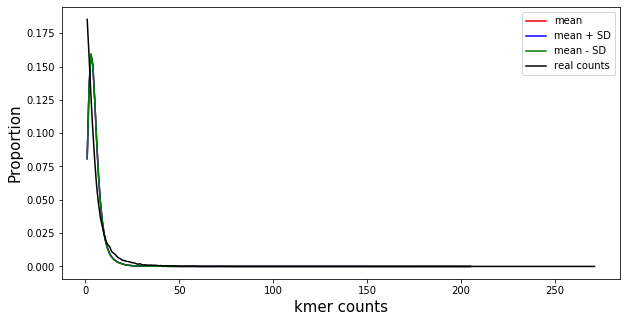

In [21]:
new_mean_values = {}
new_upper_CI = {}
new_lower_CI = {}
new_real_counts = {}

for key in mean_values.keys():
    if key >= 50:
        new_mean_values[key] = mean_values[key]
        new_upper_CI[key] = upper_CI[key]
        new_lower_CI[key] = lower_CI[key]

for key in value_counts.keys():
    if key >= 50:
        new_real_counts[key] = value_counts[key]

# Proportion as y-axis
# new_mean_values = {k: v / total for total in (sum(new_mean_values.values(), 0.0),) for k, v in new_mean_values.items()}
# new_upper_CI = {k: v / total for total in (sum(new_upper_CI.values(), 0.0),) for k, v in new_upper_CI.items()}
# new_lower_CI = {k: v / total for total in (sum(new_lower_CI.values(), 0.0),) for k, v in new_lower_CI.items()}
# new_real_counts = {k: v / total for total in (sum(new_real_counts.values(), 0.0),) for k, v in new_real_counts.items()}

new_real_counts = collections.OrderedDict(sorted(new_real_counts.items()))
new_mean_values = collections.OrderedDict(sorted(new_mean_values.items()))
new_upper_CI = collections.OrderedDict(sorted(new_upper_CI.items()))
new_lower_CI = collections.OrderedDict(sorted(new_lower_CI.items()))


fig3 = plt.figure(figsize = (10,5))
ax1 = fig3.add_subplot(1,1,1)
ax1.plot(list(new_mean_values.keys()),list(new_mean_values.values()), 'r-', label = "mean")
ax1.plot(list(new_upper_CI.keys()),list(new_upper_CI.values()), 'b-', label = "mean + SD")
ax1.plot(list(new_lower_CI.keys()),list(new_lower_CI.values()), 'g-', label = "mean - SD")
ax1.plot(list(new_real_counts.keys()),list(new_real_counts.values()), 'k-', label = "real counts")

ax1.set_xlabel("kmer counts", fontsize = 15)
ax1.set_ylabel("Proportion", fontsize = 15)
ax1.legend()